In [1]:
path = '/content/AppleStore.csv'

In [2]:
import pandas as pd
df = pd.read_csv(path)
print(df.shape)

(7197, 17)


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

### Data cleaning

##EDA

In [4]:
print(df.head())  # 5 first rows
print(df.tail(3)) # 3 last rows

   Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [6]:
print(df.describe(include='all'))

          Unnamed: 0            id         track_name    size_bytes currency  \
count    7197.000000  7.197000e+03               7197  7.197000e+03     7197   
unique           NaN           NaN               7195           NaN        1   
top              NaN           NaN  VR Roller Coaster           NaN      USD   
freq             NaN           NaN                  2           NaN     7197   
mean     4759.069612  8.631310e+08                NaN  1.991345e+08      NaN   
std      3093.625213  2.712368e+08                NaN  3.592069e+08      NaN   
min         1.000000  2.816565e+08                NaN  5.898240e+05      NaN   
25%      2090.000000  6.000937e+08                NaN  4.692275e+07      NaN   
50%      4380.000000  9.781482e+08                NaN  9.715302e+07      NaN   
75%      7223.000000  1.082310e+09                NaN  1.819249e+08      NaN   
max     11097.000000  1.188376e+09                NaN  4.025970e+09      NaN   

              price  rating_count_tot  

In [7]:
#find the number of duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
print(df[df['track_name']=='VR Roller Coaster'])

      Unnamed: 0          id         track_name  size_bytes currency  price  \
3319        4000   952877179  VR Roller Coaster   169523200      USD    0.0   
5603        7579  1089824278  VR Roller Coaster   240964608      USD    0.0   

      rating_count_tot  rating_count_ver  user_rating  user_rating_ver    ver  \
3319               107               102          3.5              3.5  2.0.0   
5603                67                44          3.5              4.0   0.81   

     cont_rating prime_genre  sup_devices.num  ipadSc_urls.num  lang.num  \
3319          4+       Games               37                5         1   
5603          4+       Games               38                0         1   

      vpp_lic  
3319        1  
5603        1  


In [9]:
# Filter out track_names whose count is not equal to 1
track_counts = df['track_name'].value_counts()

tracks_not_equal_to_one = track_counts[track_counts != 1]

In [10]:
print(tracks_not_equal_to_one)

track_name
VR Roller Coaster      2
Mannequin Challenge    2
Name: count, dtype: int64


In [11]:
# drop duplicated track_names
index1 = 7128
index2 = 5603
df_dropped = df.drop([index1, index2])

In [12]:
df_dropped.to_csv('proposed_applestore_0519.csv')

## Analysis of factors affecting ratings

In [48]:
# data processing

df = df_dropped

# change unit of size to MB
df['size_mb'] = df['size_bytes'] / (1024 * 1024)

# add 'is_paid' column
df['is_paid'] = df['price'].apply(lambda x: 'Paid' if x > 0 else 'Free')

print(df[['user_rating', 'price', 'size_mb']].describe())


       user_rating        price      size_mb
count  7195.000000  7195.000000  7195.000000
mean      3.526894     1.726698   189.922368
std       1.518148     5.833746   342.610106
min       0.000000     0.000000     0.562500
25%       3.500000     0.000000    44.729004
50%       4.000000     0.000000    92.652344
75%       4.500000     1.990000   173.427246
max       5.000000   299.990000  3839.463867


<ipython-input-49-e2375aade8b2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_paid', y='user_rating', data=df, palette='Set2')


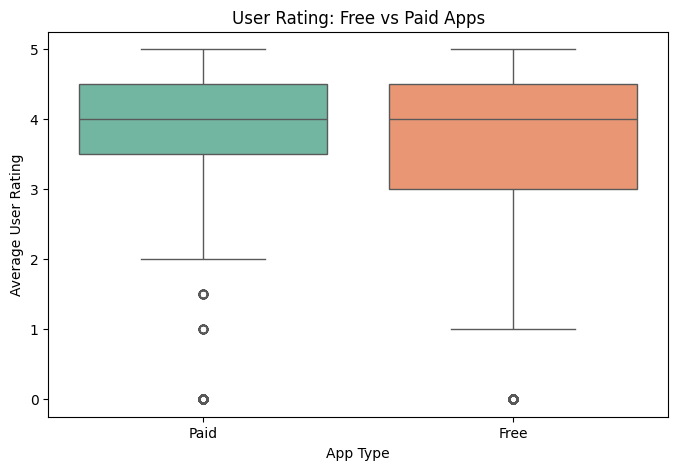

In [49]:
# rating vs price
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot：Rating comparison (free vs paid)
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_paid', y='user_rating', data=df, palette='Set2')
plt.title("User Rating: Free vs Paid Apps")
plt.ylabel("Average User Rating")
plt.xlabel("App Type")
plt.show()


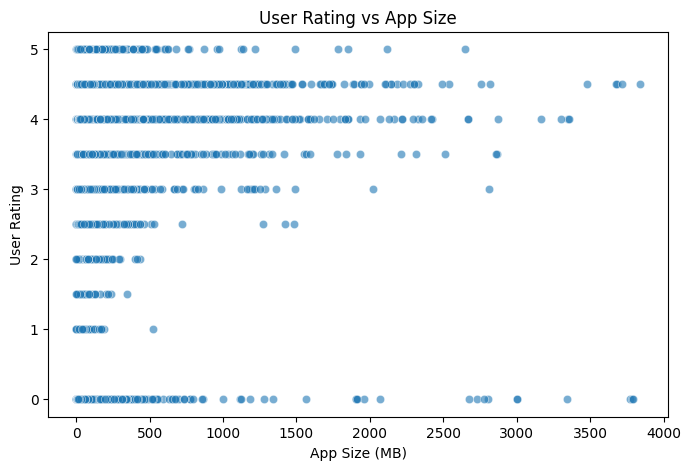

In [50]:
# Distribution of Ratings vs App Size
plt.figure(figsize=(8, 5))
sns.scatterplot(x='size_mb', y='user_rating', data=df, alpha=0.6)
plt.title("User Rating vs App Size")
plt.xlabel("App Size (MB)")
plt.ylabel("User Rating")
plt.show()


<ipython-input-51-256cd2f477cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lang.num', y='user_rating', data=df[df['lang.num'] < 20], palette='coolwarm')


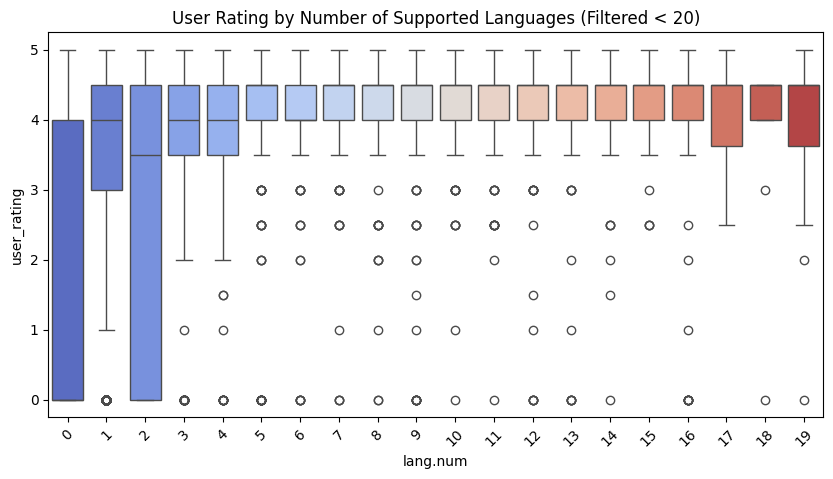

In [51]:
# visualization per group: the impact of the number of languages ​​on the score
plt.figure(figsize=(10, 5))
sns.boxplot(x='lang.num', y='user_rating', data=df[df['lang.num'] < 20], palette='coolwarm')
plt.title("User Rating by Number of Supported Languages (Filtered < 20)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-52-558fde730a60>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.values, y=genre_rating.index, palette='viridis')


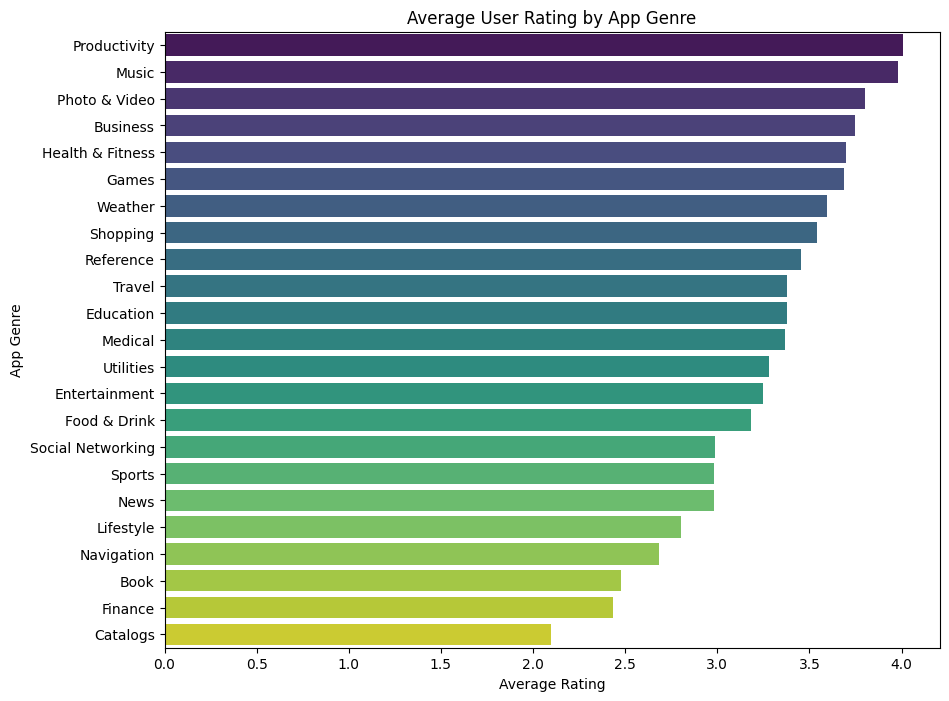

In [52]:
# Average rating by genre in descending order
genre_rating = df.groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=genre_rating.values, y=genre_rating.index, palette='viridis')
plt.title("Average User Rating by App Genre")
plt.xlabel("Average Rating")
plt.ylabel("App Genre")
plt.show()


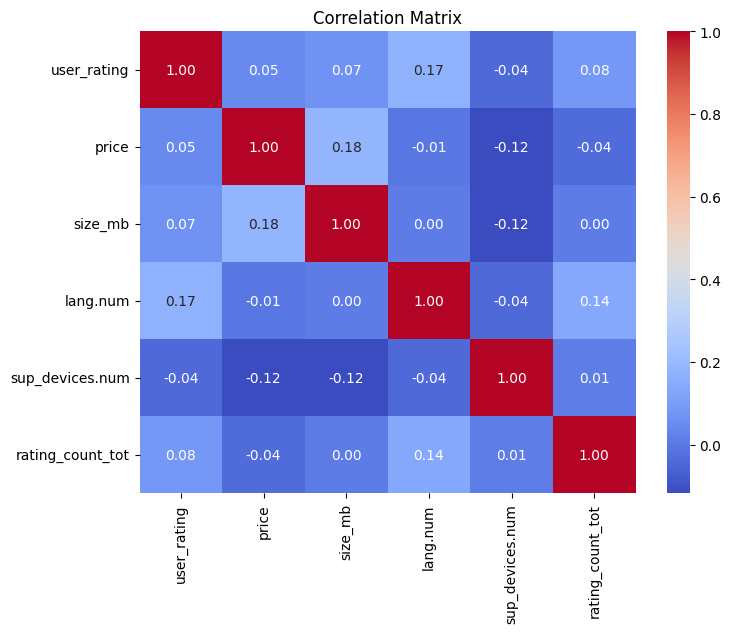

In [53]:
 # Select numeric columns for correlation analysis
num_cols = ['user_rating', 'price', 'size_mb', 'lang.num', 'sup_devices.num', 'rating_count_tot']
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


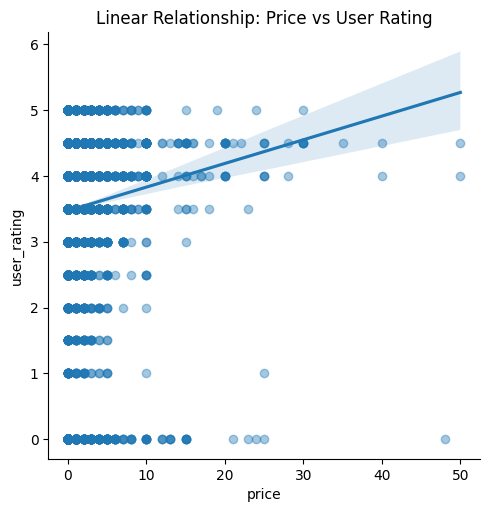

In [54]:
# linear regression between price and rating
sns.lmplot(x='price', y='user_rating', data=df[df['price'] < 50], scatter_kws={'alpha':0.4})
plt.title("Linear Relationship: Price vs User Rating")
plt.show()


### Game Genre Analysis

In [13]:
import pandas as pd

df = df_dropped

# Group calculation: average rating, median rating, average price
genre_stats = df.groupby("prime_genre").agg(
    avg_rating=('user_rating', 'mean'),
    median_rating_count=('rating_count_tot', 'median'),
    avg_price=('price', 'mean'),
    app_count=('id', 'count')
).reset_index()

# sorting
genre_stats_sorted = genre_stats.sort_values(by="avg_rating", ascending=False)


In [14]:
print("Top Rated App Genre：")
print(genre_stats_sorted.head(3)[['prime_genre', 'avg_rating']])

print("\nLowest Rated App Genre：")
print(genre_stats_sorted.tail(3)[['prime_genre', 'avg_rating']])


Top Rated App Genre：
      prime_genre  avg_rating
15   Productivity    4.005618
11          Music    3.978261
14  Photo & Video    3.800860

Lowest Rated App Genre：
  prime_genre  avg_rating
0        Book    2.477679
5     Finance    2.432692
2    Catalogs    2.100000


<ipython-input-15-348a4b81feb3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


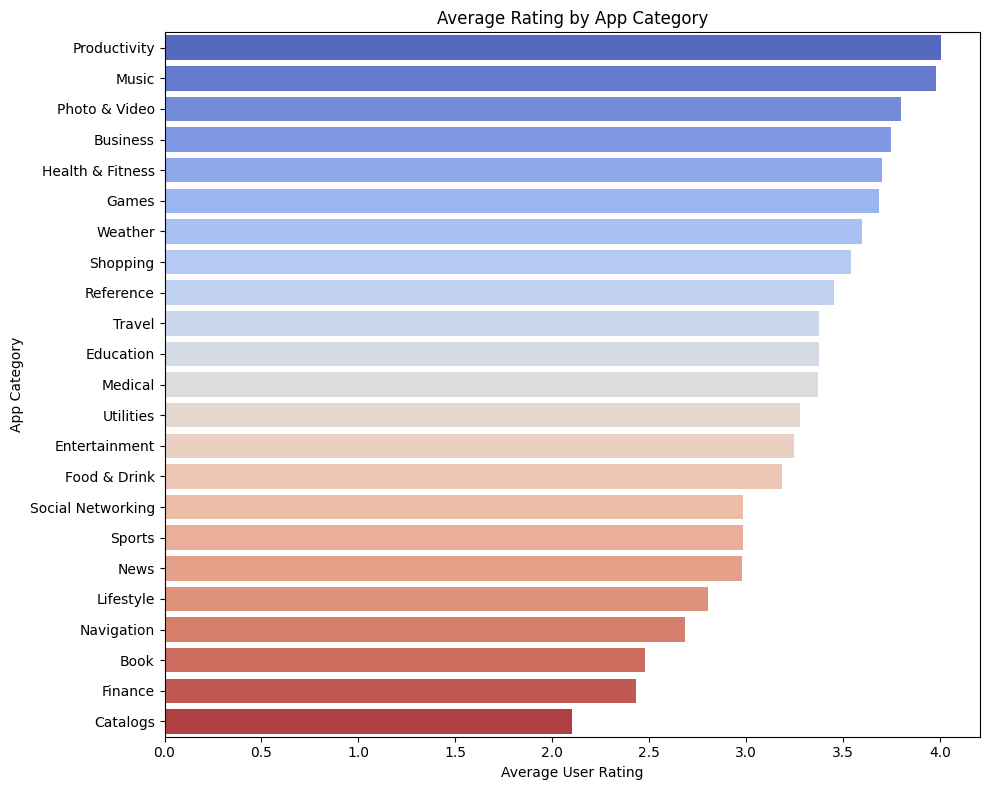

In [15]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(
    y='prime_genre',
    x='avg_rating',
    data=genre_stats_sorted,
    palette='coolwarm'
)
plt.title("Average Rating by App Category")
plt.xlabel("Average User Rating")
plt.ylabel("App Category")
plt.tight_layout()
plt.show()


<ipython-input-16-3caf474fc0a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


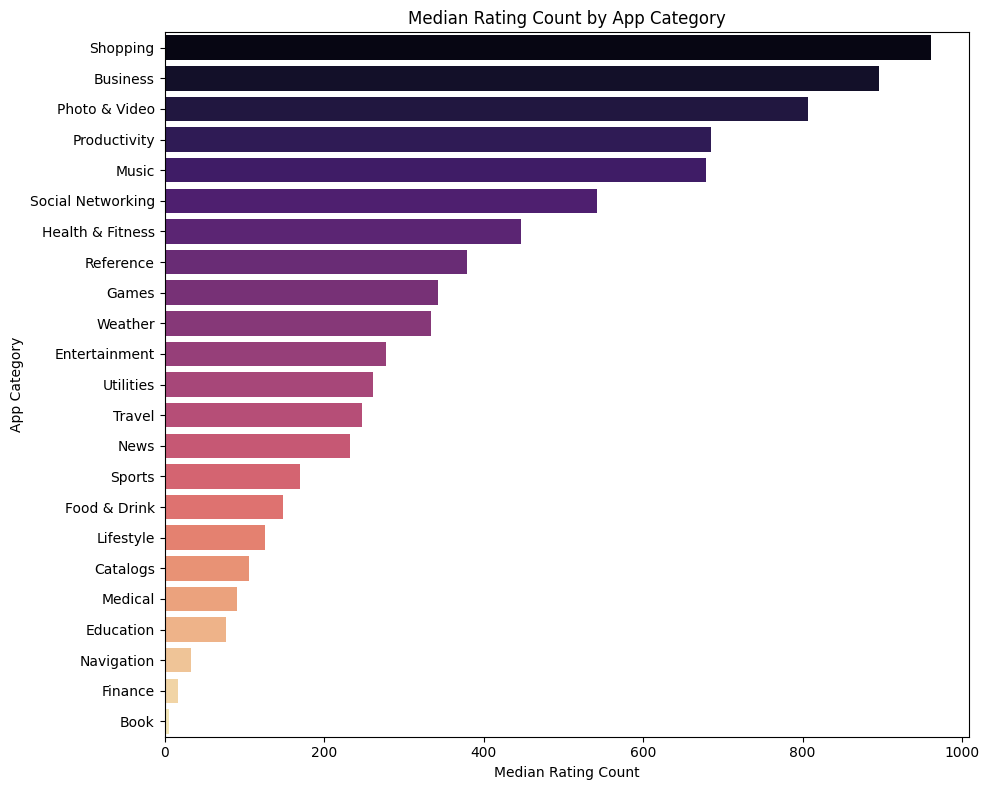

In [16]:
# sort by number median
sorted_by_rating_count = genre_stats.sort_values(by="median_rating_count", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    y='prime_genre',
    x='median_rating_count',
    data=sorted_by_rating_count,
    palette='magma'
)
plt.title("Median Rating Count by App Category")
plt.xlabel("Median Rating Count")
plt.ylabel("App Category")
plt.tight_layout()
plt.show()


<ipython-input-17-5db17aea5056>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


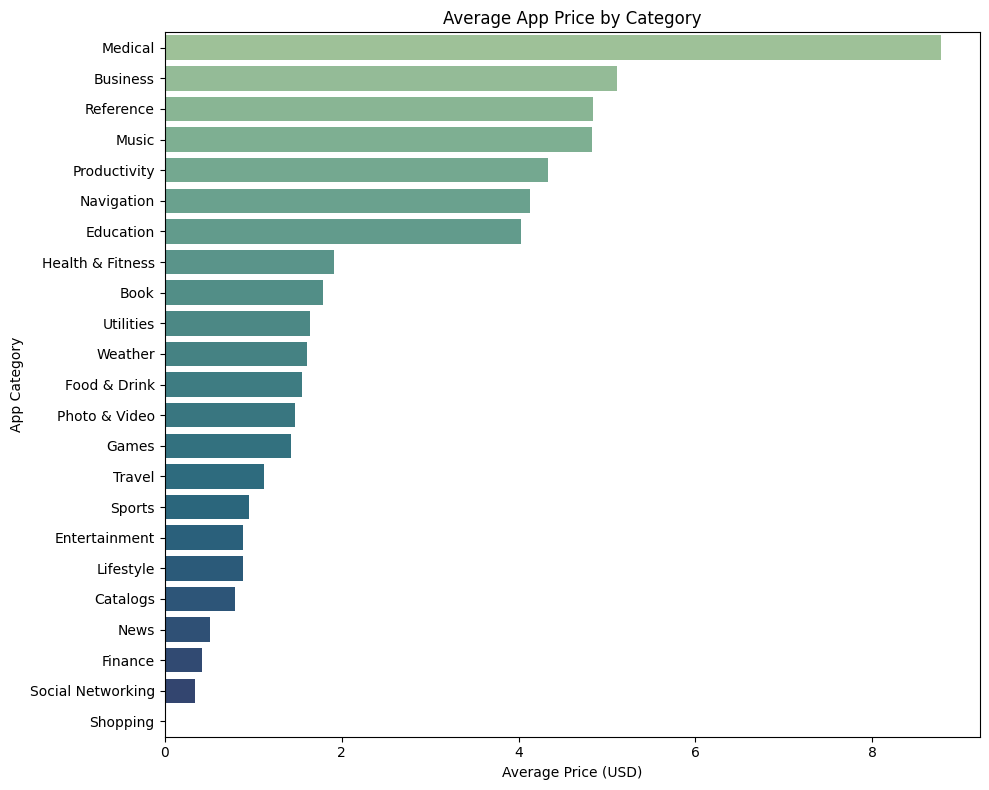

In [17]:
# sort by average price
plt.figure(figsize=(10, 8))
sns.barplot(
    y='prime_genre',
    x='avg_price',
    data=genre_stats.sort_values(by="avg_price", ascending=False),
    palette='crest'
)
plt.title("Average App Price by Category")
plt.xlabel("Average Price (USD)")
plt.ylabel("App Category")
plt.tight_layout()
plt.show()


<ipython-input-18-cf46f80b5b6d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


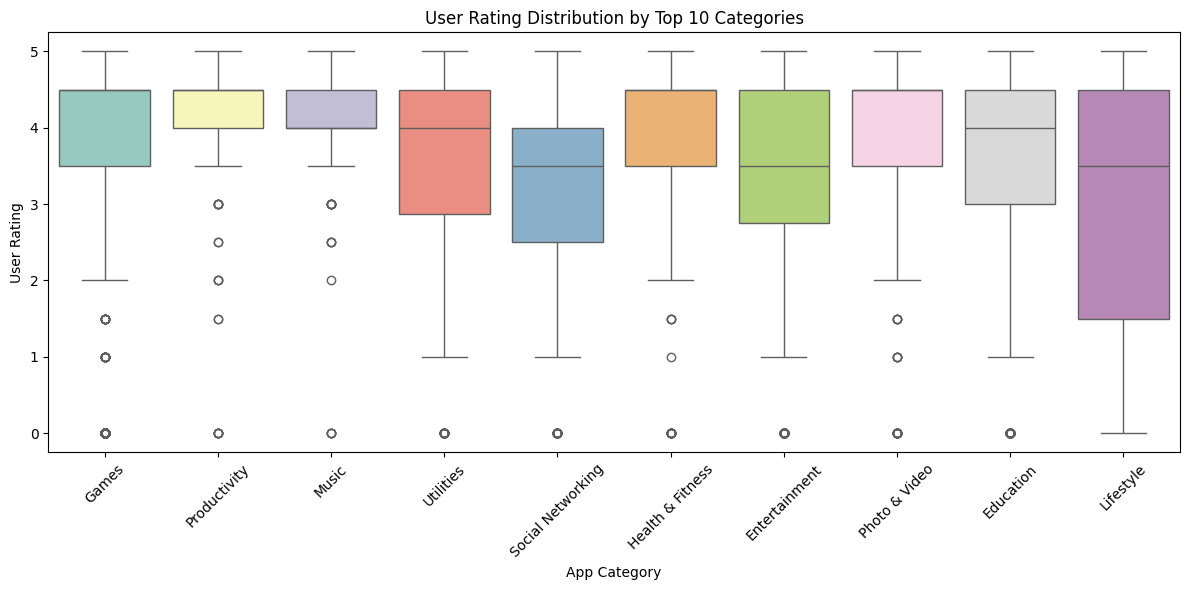

In [18]:
# top 10 gneres' boxplot
top_genres = genre_stats.sort_values("app_count", ascending=False).head(10)['prime_genre'].tolist()

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[df['prime_genre'].isin(top_genres)],
    x='prime_genre',
    y='user_rating',
    palette='Set3'
)
plt.xticks(rotation=45)
plt.title("User Rating Distribution by Top 10 Categories")
plt.ylabel("User Rating")
plt.xlabel("App Category")
plt.tight_layout()
plt.show()


## Free vs Paid App Analysis

In [14]:
df = df_dropped

# label free & paid
df['app_type'] = df['price'].apply(lambda x: 'Paid' if x > 0 else 'Free')

# distribution
print(df['app_type'].value_counts())

app_type
Free    4054
Paid    3141
Name: count, dtype: int64


<ipython-input-15-ecf1e4bf0653>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='app_type', y='user_rating', palette='Set2')


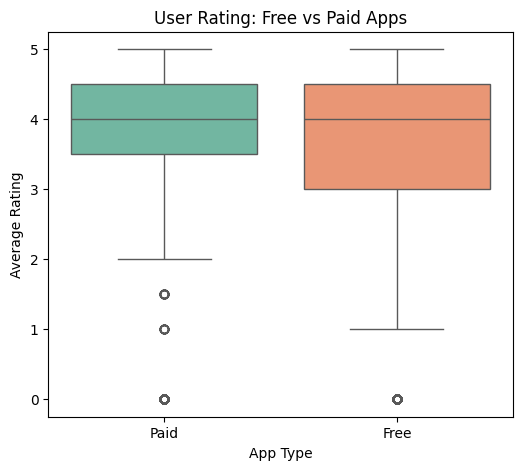

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: comparsion of avg ratings
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='app_type', y='user_rating', palette='Set2')
plt.title('User Rating: Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Average Rating')
plt.show()


<ipython-input-16-e24f7623d066>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['rating_count_tot'] < 100000],  # 限制极值影响


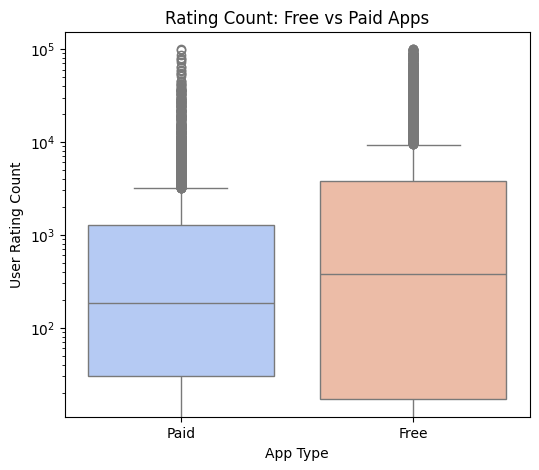

In [16]:
# Boxplot: comparsion of number of ratings
plt.figure(figsize=(6, 5))
sns.boxplot(data=df[df['rating_count_tot'] < 100000],
            x='app_type', y='rating_count_tot', palette='coolwarm')
plt.title('Rating Count: Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('User Rating Count')
plt.yscale('log')
plt.show()


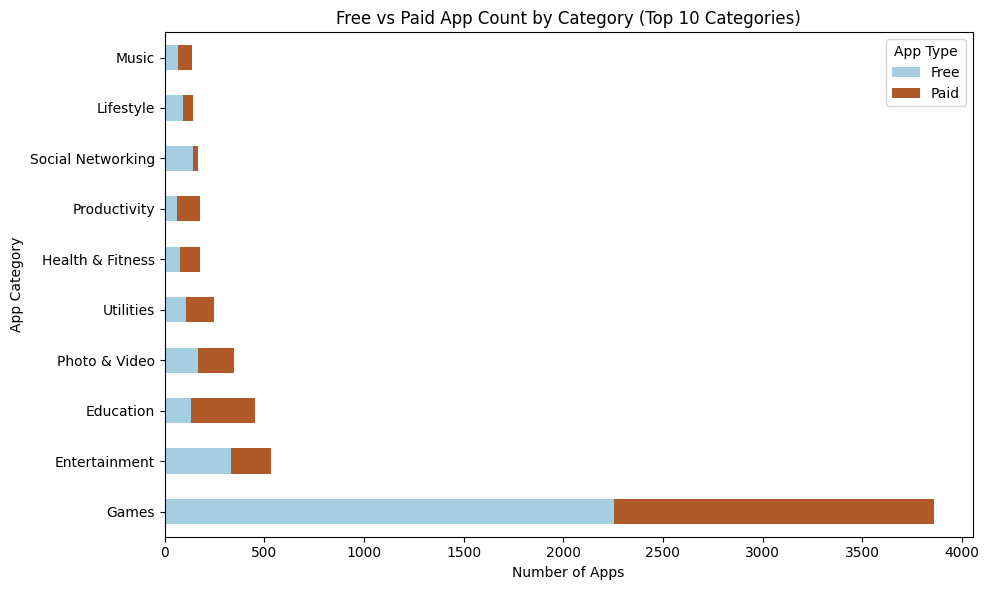

In [17]:
# Count the number of free and paid apps in each genre
genre_paid_dist = df.groupby(['prime_genre', 'app_type']).size().reset_index(name='count')

# Pivot -- a stacked chart format
genre_pivot = genre_paid_dist.pivot(index='prime_genre', columns='app_type', values='count').fillna(0)

# Show only the top 10 genre (by total number of apps)
top_genres = genre_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
top_genre_pivot = genre_pivot.loc[top_genres]

# bar chart
top_genre_pivot[['Free', 'Paid']].plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title("Free vs Paid App Count by Category (Top 10 Categories)")
plt.xlabel("Number of Apps")
plt.ylabel("App Category")
plt.legend(title="App Type")
plt.tight_layout()
plt.show()
